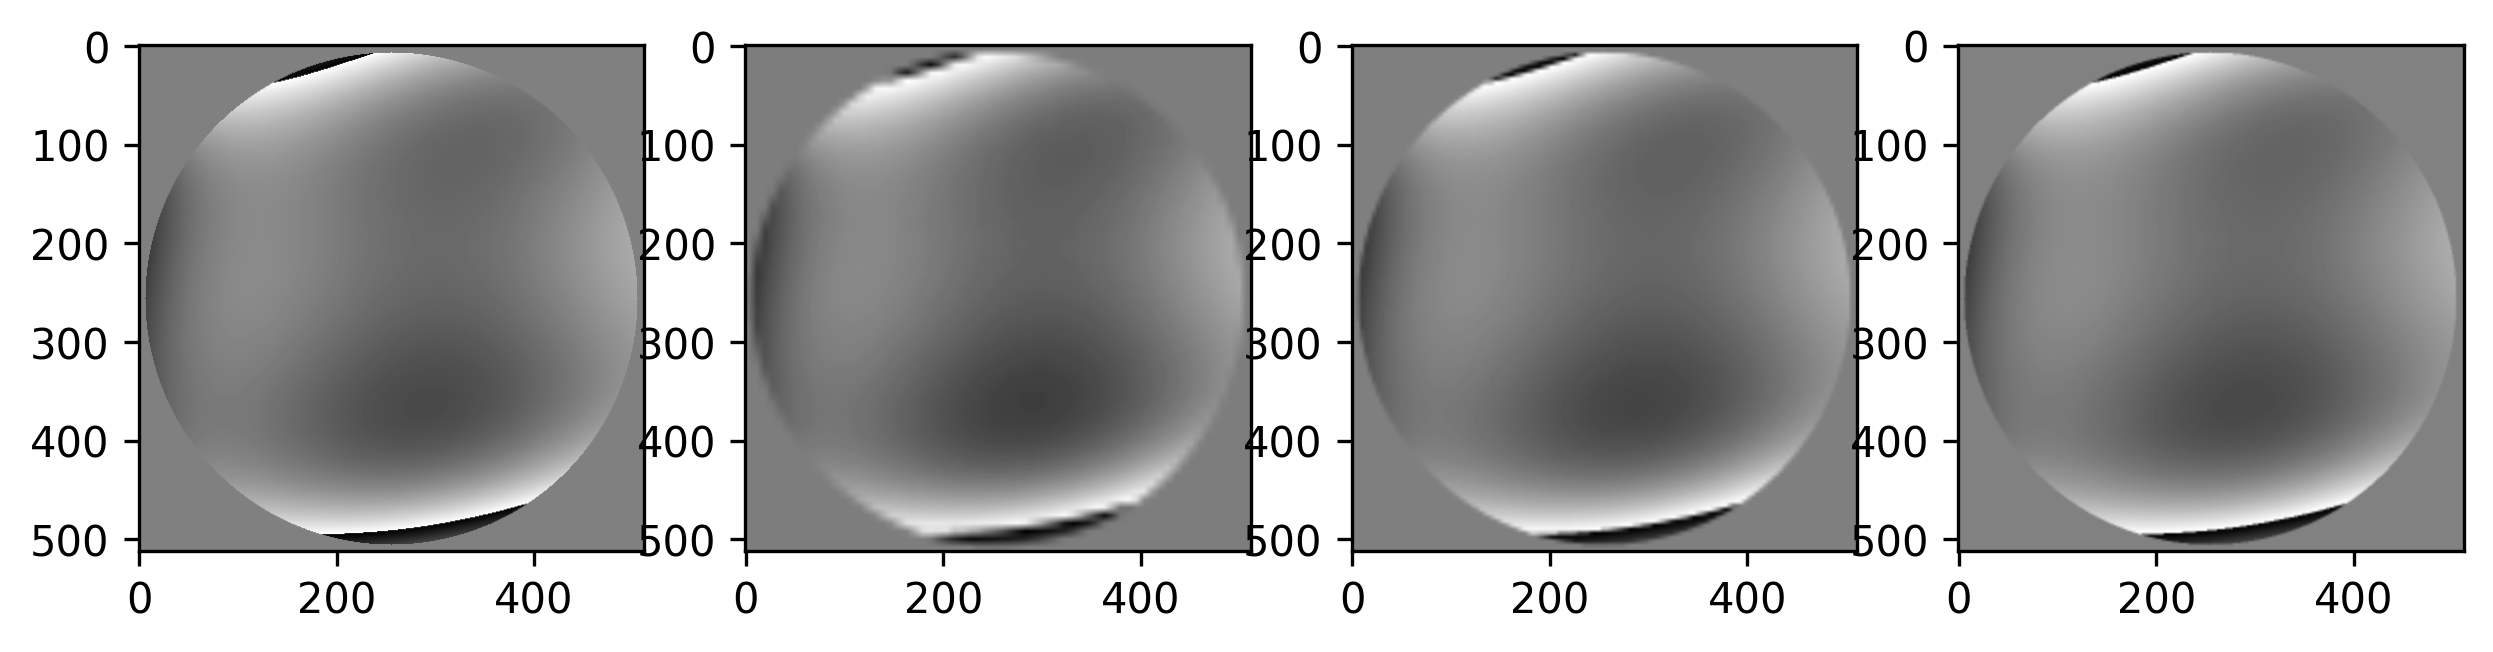

In [1]:
# read the images 
import imageio.v2 as iio
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from LightPipes import *
import math
from skimage.color import rgb2gray

# read an image 
img_orginal = iio.imread(r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Test_Resize\inter_linear\folder_phasemask_original\phase_mask_15301.png")
img_64=iio.imread(r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Test_Resize\inter_linear\folder_phasemask_resized_64_64\phase_mask_15301.png")
img_128=iio.imread(r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Test_Resize\inter_linear\folder_phasemask_resized_128_128\phase_mask_15301.png")
img_256=iio.imread(r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Test_Resize\inter_linear\folder_phasemask_resized_256_256\phase_mask_15301.png")

# change the image to grayscale
img_orginal = rgb2gray(img_orginal)
img_64 = rgb2gray(img_64)
img_128 = rgb2gray(img_128)
img_256 = rgb2gray(img_256)
# Output Images
from matplotlib.pyplot import figure
figure(figsize=(10, 12), dpi=300)
plt.subplot(1,4,1)
plt.imshow(img_orginal,cmap='gray')
plt.subplot(1,4,2)
plt.imshow(img_64,cmap='gray')
plt.subplot(1,4,3)
plt.imshow(img_128,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(img_256,cmap='gray')

Text(0.5, 1.0, 'Phase')

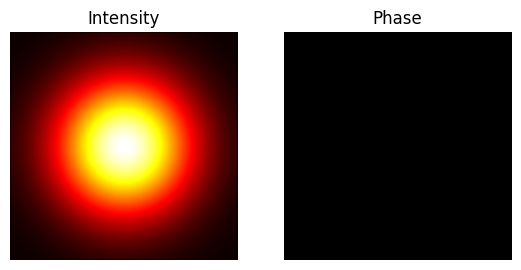

In [2]:
#change the phase profile to phase value and reverse the phase mask
phase_orginal=(255-img_orginal)/255*np.pi*2-np.pi
P64=(255-img_64)/255*np.pi*2-np.pi          # P64
P128=(255-img_128)/255*np.pi*2-np.pi        # P128
P256=(255-img_256)/255*np.pi*2-np.pi        # P256
size=10*mm
wavelength=1.03*um
N=512
#creat an input field 
F=Begin(size,wavelength,N)
F=GaussBeam(F, 4.2*mm) 
Phi=Phase(F)
I=Intensity(F,1)
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax1.imshow(I,cmap='hot'); ax1.axis('off'); ax1.set_title('Intensity'); 
ax2.imshow(Phi,cmap='gray'); ax2.axis('off'); ax2.set_title('Phase')


(512, 512)


Text(0.5, 1.0, 'Phase')

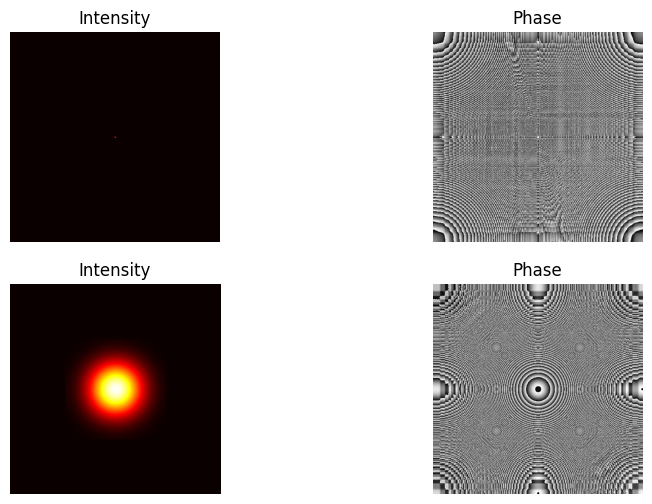

In [3]:
# generate the far field 512
f=300*mm
Phi=phase_orginal
print(np.shape(phase_orginal))

F_orginal= MultPhase(F, Phi)

P_lens=Lens(F_orginal, f)

F_focus=Fresnel(P_lens,300*mm)  #far field 
F_defocus=Fresnel(P_lens,150*mm)  #near field 

#focus
Phi_focus=Phase(F_focus)
I_focus=Intensity(F_focus,1)

# defocus
Phi_defocus=Phase(F_defocus)
I_defocus=Intensity(F_defocus,1)

fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.imshow(I_focus,cmap='hot'); ax1.axis('off'); ax1.set_title('Intensity')
ax2.imshow(Phi_focus,cmap='gray'); ax2.axis('off'); ax2.set_title('Phase')
ax3.imshow(I_defocus,cmap='hot'); ax3.axis('off'); ax3.set_title('Intensity')
ax4.imshow(Phi_defocus,cmap='gray'); ax4.axis('off'); ax4.set_title('Phase')

Text(0.5, 1.0, 'Phase')

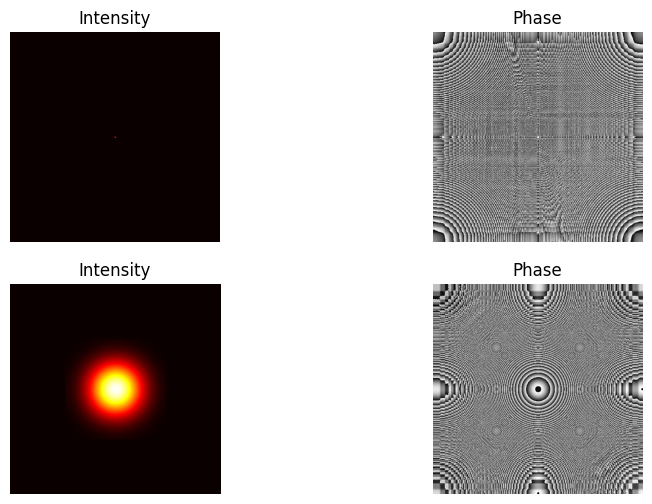

In [10]:
# generate the far field 256
Phi=P256
F256= MultPhase(F, Phi)
P_lens=Lens(F256, f)

F_focus256=Fresnel(P_lens,300*mm)  #far field 
F_defocus256=Fresnel(P_lens,150*mm)  #near field 

#focus
Phi_focus256=Phase(F_focus256)
I_focus256=Intensity(F_focus256,1)

# defocus
Phi_defocus256=Phase(F_defocus256)
I_defocus256=Intensity(F_defocus256,1)

fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.imshow(I_focus,cmap='hot'); ax1.axis('off'); ax1.set_title('Intensity')
ax2.imshow(Phi_focus,cmap='gray'); ax2.axis('off'); ax2.set_title('Phase')
ax3.imshow(I_defocus,cmap='hot'); ax3.axis('off'); ax3.set_title('Intensity')
ax4.imshow(Phi_defocus,cmap='gray'); ax4.axis('off'); ax4.set_title('Phase')

Text(0.5, 1.0, 'Phase')

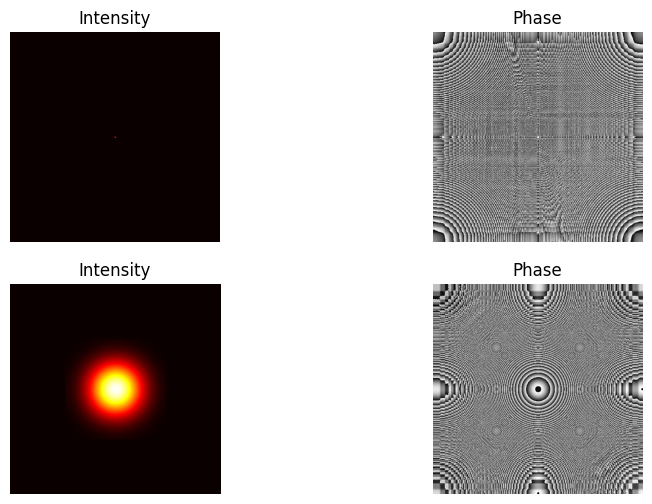

In [11]:
# generate the far field 128
Phi=P128
F128 = MultPhase(F, Phi)
P_lens=Lens(F128, f)

F_focus128=Fresnel(P_lens,300*mm)  #far field 

F_defocus128=Fresnel(P_lens,150*mm)  #near field 

#focus
Phi_focus128=Phase(F_focus128)
I_focus128=Intensity(F_focus128,1)

# defocus
Phi_defocus128=Phase(F_defocus128)
I_defocus128=Intensity(F_defocus128,1)

fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.imshow(I_focus,cmap='hot'); ax1.axis('off'); ax1.set_title('Intensity')
ax2.imshow(Phi_focus,cmap='gray'); ax2.axis('off'); ax2.set_title('Phase')
ax3.imshow(I_defocus,cmap='hot'); ax3.axis('off'); ax3.set_title('Intensity')
ax4.imshow(Phi_defocus,cmap='gray'); ax4.axis('off'); ax4.set_title('Phase')

Text(0.5, 1.0, 'Phase')

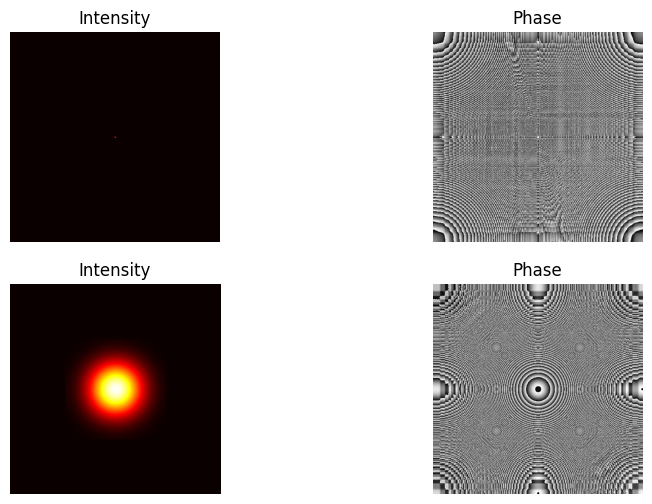

In [12]:
# generate the far field 64
Phi=P64
F64 = MultPhase(F, Phi)
P_lens=Lens(F64, f)

F_focus64=Fresnel(P_lens,300*mm)  #far field 

F_defocus64=Fresnel(P_lens,150*mm)  #near field 

#focus
Phi_focus64=Phase(F_focus64)
I_focus64=Intensity(F_focus64,1)

# defocus
Phi_defocus64=Phase(F_defocus64)
I_defocus64=Intensity(F_defocus64,1)

fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.imshow(I_focus,cmap='hot'); ax1.axis('off'); ax1.set_title('Intensity')
ax2.imshow(Phi_focus,cmap='gray'); ax2.axis('off'); ax2.set_title('Phase')
ax3.imshow(I_defocus,cmap='hot'); ax3.axis('off'); ax3.set_title('Intensity')
ax4.imshow(Phi_defocus,cmap='gray'); ax4.axis('off'); ax4.set_title('Phase')



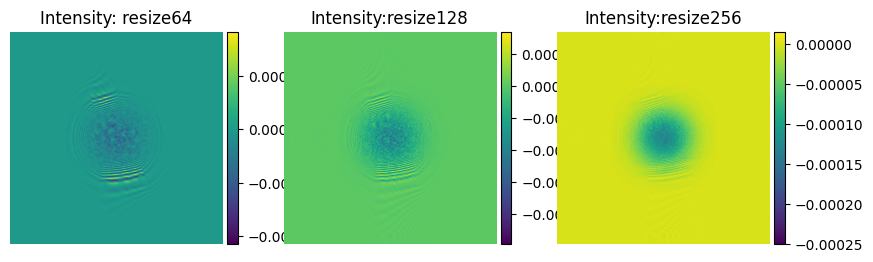

In [16]:
# check the difference with regarding the orginal image

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#64 and orginal ( defocus)
I_diff64=I_defocus64-I_defocus

I_diff128=I_defocus128-I_defocus
np.mean(I_diff128)
I_diff256=I_defocus256-I_defocus
np.mean(I_diff256)



fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(131)
im1=ax1.imshow(I_diff64,cmap='viridis'); ax1.axis('off'); ax1.set_title('Intensity: resize64')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(132)
im2=ax2.imshow(I_diff128,cmap='viridis'); ax2.axis('off'); ax2.set_title('Intensity:resize128')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')



ax3 = fig.add_subplot(133)
im3=ax3.imshow(I_diff256,cmap='viridis'); ax3.axis('off'); ax3.set_title('Intensity:resize256')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')
plt.show()

In [17]:
# calculate the mean value of the intenstiy difference 
M1=np.mean(np.abs(I_diff64))
M2=np.mean(np.abs(I_diff128))
M3=np.mean(np.abs(I_diff256))


print(M1, M2, M2)

5.3145433512252234e-06 5.111532322423988e-06 5.111532322423988e-06
